# Naive Bayes

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix

## Import Data

In [2]:
movies = pd.read_csv('./data/movies_cleaned.csv')

In [3]:
# gonna start with a simple binary classification task using the two most common genres
data = movies[movies['Genre'].isin(['comedy', 'drama'])].copy(deep=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10343 entries, 1 to 20956
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      10343 non-null  int64 
 1   Title             10343 non-null  object
 2   Origin/Ethnicity  10343 non-null  object
 3   Director          10343 non-null  object
 4   Genre             10343 non-null  object
 5   Plot              10343 non-null  object
 6   plot_length       10343 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 646.4+ KB


## Baseline

In [6]:
data['Genre'].value_counts(normalize=True)

drama     0.576622
comedy    0.423378
Name: Genre, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data['Plot'], data['Genre'])

## Basic NB model

### Count Vectorizer

In [11]:
cvect = CountVectorizer()
X_train_vect = cvect.fit_transform(X_train)
X_test_vect = cvect.transform(X_test)

In [12]:
bayes = MultinomialNB()

In [13]:
bayes.fit(X_train_vect, y_train)
bayes.score(X_train_vect, y_train)

0.9320613639293541

In [14]:
bayes.score(X_test_vect, y_test)

0.7645011600928074

### Tfidf Vectorizer

In [15]:
tfidf = TfidfVectorizer()

In [16]:
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [18]:
bayes.fit(X_train_tf, y_train)
bayes.score(X_train_tf, y_train)

0.7428129431481243

In [19]:
bayes.score(X_test_tf, y_test)

0.631477184841454

## Optimize the count vectorizer model

In [20]:
pipe = make_pipeline(CountVectorizer(), MultinomialNB())

In [21]:
params = {
    'countvectorizer__stop_words': [None, 'english'],
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)],
    'countvectorizer__max_features': [1000, 2500, 5000, 7500, 10_000, 12_500, None],
    'multinomialnb__alpha': [0.1, 1, 10, 100]
}

In [22]:
gs = GridSearchCV(pipe, params, n_jobs = -1)

In [23]:
%%time
gs.fit(X_train, y_train)

CPU times: user 14.3 s, sys: 14.1 s, total: 28.4 s
Wall time: 45min 52s


GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [1000, 2500, 5000,
                                                           7500, 10000, 12500,
                                                           None],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3), (2, 2),
                                                          (2, 3), (3, 3)],
                         'countvectorizer__stop_words': [None, 'english'],
                         'multinomialnb__alpha': [0.1, 1, 10, 100]})

In [24]:
gs.score(X_train, y_train)

0.9987108418202914

In [40]:
gs.score(X_test, y_test)

0.7815158546017015

In [26]:
gs.best_params_

{'countvectorizer__max_features': None,
 'countvectorizer__ngram_range': (1, 2),
 'countvectorizer__stop_words': None,
 'multinomialnb__alpha': 0.1}

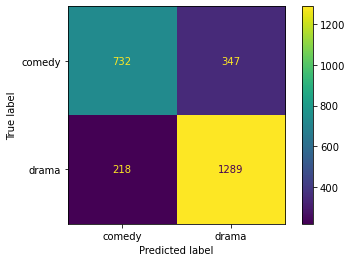

In [39]:
plot_confusion_matrix(gs, X_test, y_test)

In [35]:
params2 = {
    'countvectorizer__ngram_range': [(1, 2)],
    'multinomialnb__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.05, 0.06, 0.07, 0.08, 0.09]
}

In [36]:
gs2 = GridSearchCV(pipe, params2, n_jobs = -1)

In [37]:
%%time
gs2.fit(X_train, y_train)
gs2.score(X_test, y_test)

CPU times: user 5.56 s, sys: 475 ms, total: 6.03 s
Wall time: 1min 20s


0.7791956689868523

In [38]:
gs2.best_params_

{'countvectorizer__ngram_range': (1, 2), 'multinomialnb__alpha': 0.4}